In [1]:
# To prevent the annoying warnings

import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dataframe = pd.read_csv('After_Feature_Engineering.csv')

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97212 entries, 0 to 97211
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   97212 non-null  float64
 1   Annual_Income                         97212 non-null  float64
 2   Monthly_Inhand_Salary                 97212 non-null  float64
 3   Num_Bank_Accounts                     97212 non-null  float64
 4   Num_Credit_Card                       97212 non-null  float64
 5   Interest_Rate                         97212 non-null  float64
 6   Num_of_Loan                           21515 non-null  float64
 7   Delay_from_due_date                   97212 non-null  int64  
 8   Num_of_Delayed_Payment                97212 non-null  float64
 9   Changed_Credit_Limit                  97212 non-null  float64
 10  Num_Credit_Inquiries                  97212 non-null  float64
 11  Credit_Mix     

In [5]:
dataframe = dataframe.dropna()

In [6]:
from sklearn.model_selection import train_test_split

X_df = dataframe.drop(columns=['Credit_Score'])
y_df = dataframe['Credit_Score']

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.30, random_state=100)

In [7]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
                 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 
                 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

scaler = MinMaxScaler()
X_train_df[cols_to_scale] = scaler.fit_transform(X_train_df[cols_to_scale])
X_test_df[cols_to_scale] = scaler.transform(X_test_df[cols_to_scale])

X_train = X_train_df[cols_to_scale].values
X_test = X_test_df[cols_to_scale].values
y_train = y_train_df.values
y_test = y_test_df.values

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model):
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    y_score = model.predict_proba(X_test)
    n_classes = y_test_bin.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    colors = plt.cm.jet(np.linspace(0, 1, n_classes))
    lw = 2  # Line width
    
    plt.figure(figsize=(10, 8))
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.show()

# Using RandomForestClassifier

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
prediction = rfc_model.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2018
           1       0.79      0.82      0.81      2566
           2       0.79      0.74      0.76      1871

    accuracy                           0.80      6455
   macro avg       0.80      0.80      0.80      6455
weighted avg       0.80      0.80      0.80      6455

[[1659  244  115]
 [ 197 2106  263]
 [ 179  300 1392]]


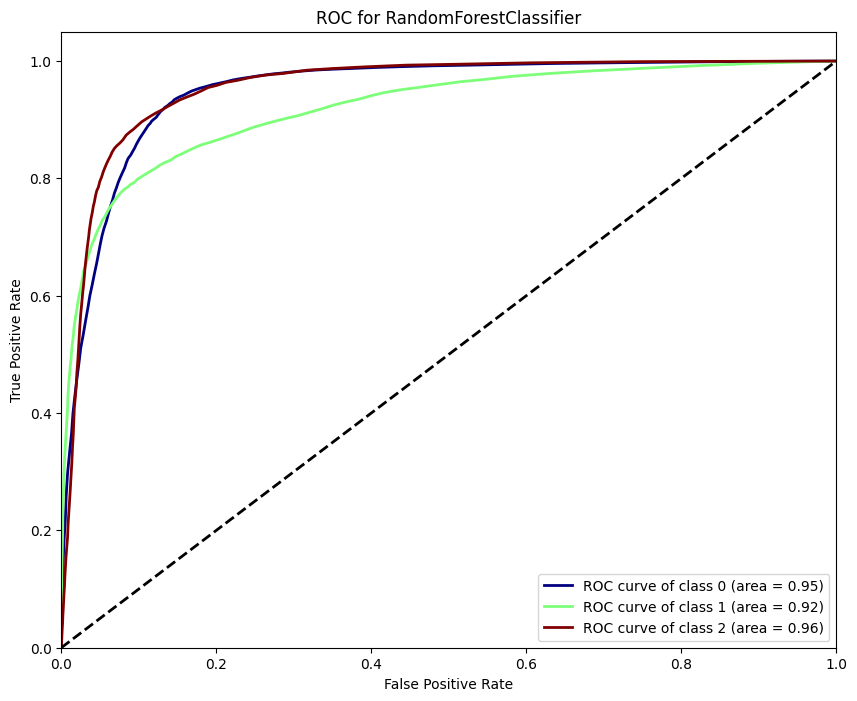

In [9]:
plot_roc_curve(rfc_model)

# LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      2018
           1       0.67      0.71      0.69      2566
           2       0.56      0.48      0.52      1871

    accuracy                           0.64      6455
   macro avg       0.63      0.63      0.63      6455
weighted avg       0.64      0.64      0.64      6455

[[1414  350  254]
 [ 295 1811  460]
 [ 432  535  904]]


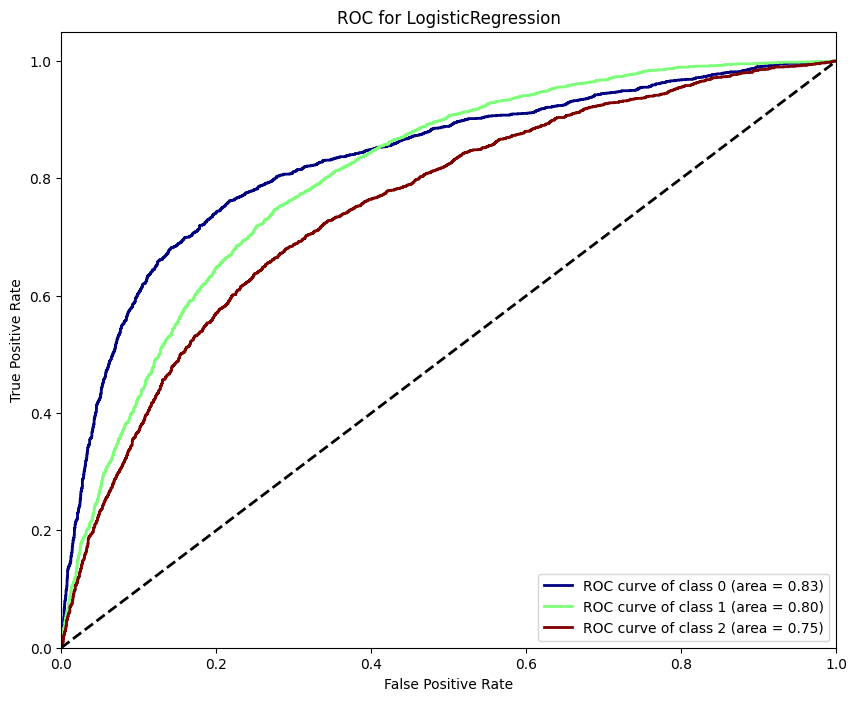

In [12]:
plot_roc_curve(lr_model)

# XGBClassifier

In [13]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

prediction = xgb_model.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2018
           1       0.77      0.83      0.80      2566
           2       0.76      0.71      0.74      1871

    accuracy                           0.78      6455
   macro avg       0.78      0.78      0.78      6455
weighted avg       0.78      0.78      0.78      6455

[[1593  274  151]
 [ 172 2124  270]
 [ 187  349 1335]]


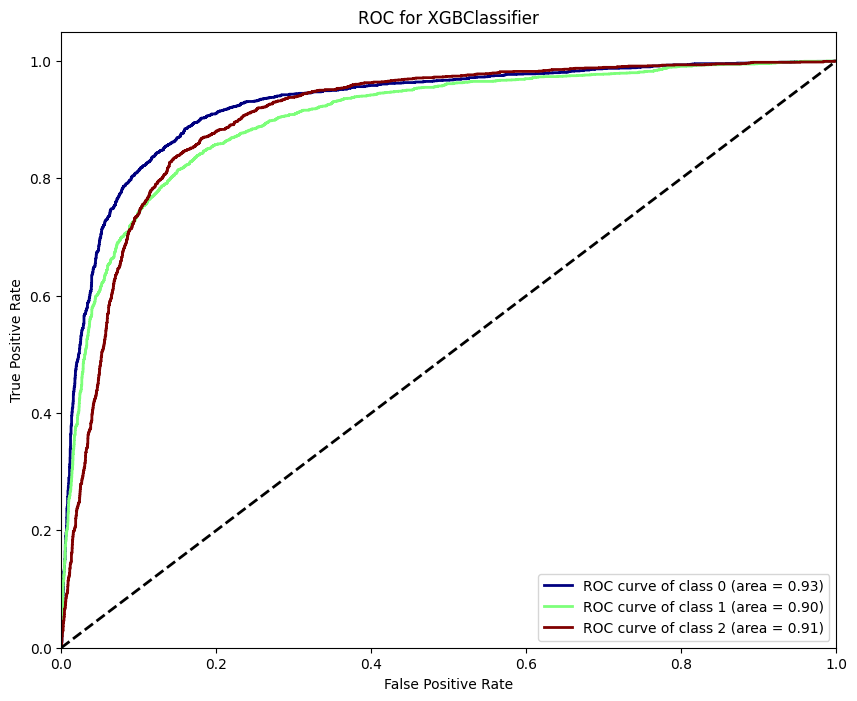

In [14]:
plot_roc_curve(xgb_model)

# KNeighborsClassifier

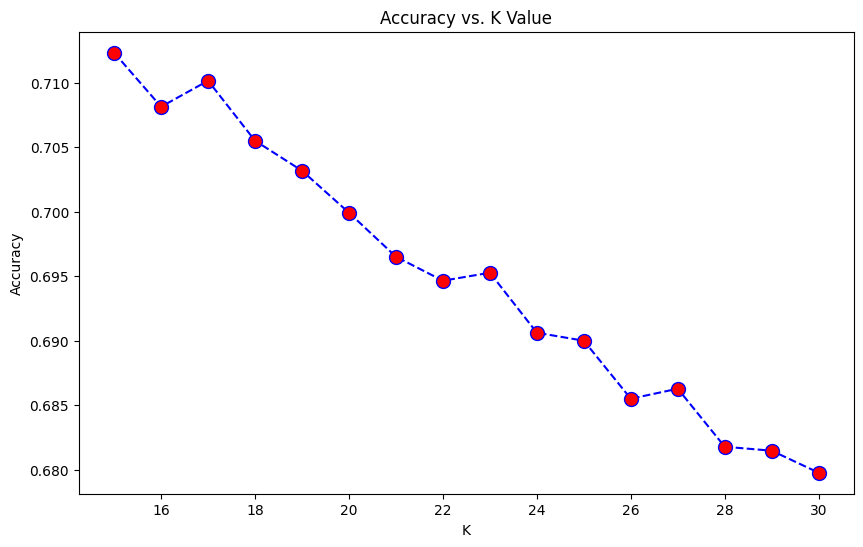

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Determine the maximum value of k you'd like to consider (e.g., 20)
max_k = 30
accuracies = []

# Calculate accuracy for K values from 1 to max_k
for k in range(15, max_k+1):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    pred_k = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred_k))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(15, max_k+1), accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=17)
knn_model.fit(X_train, y_train)

prediction = knn_model.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      2018
           1       0.71      0.77      0.74      2566
           2       0.68      0.59      0.63      1871

    accuracy                           0.71      6455
   macro avg       0.71      0.70      0.70      6455
weighted avg       0.71      0.71      0.71      6455

[[1490  324  204]
 [ 255 1986  325]
 [ 287  476 1108]]


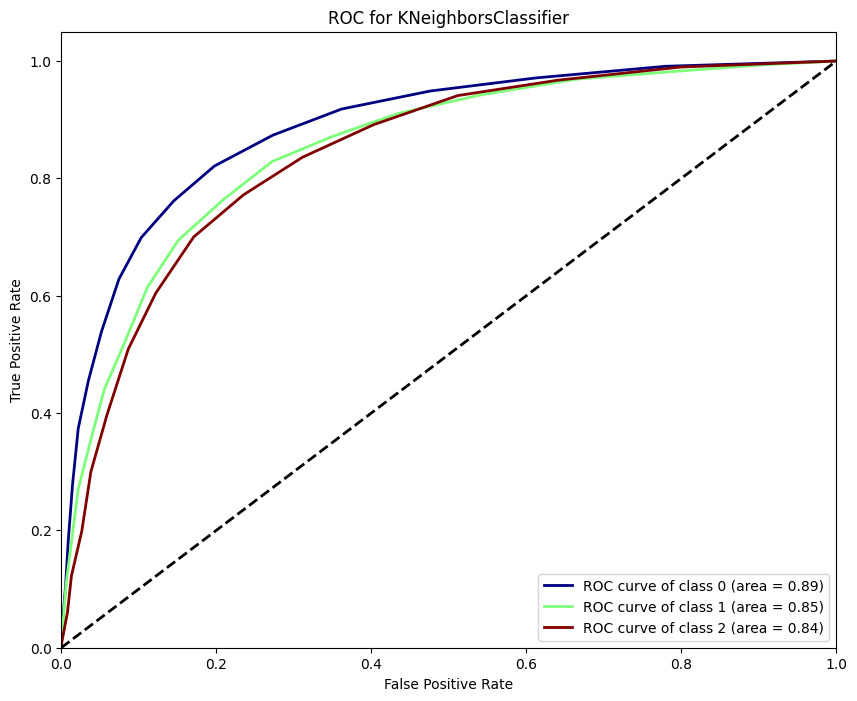

In [17]:
plot_roc_curve(knn_model)

---
## After clearly inspecting few classification models, it is evident that RandomForestClassifier out performs all the other model

# Applying SHAP on RandomForestClassifier trained model

In [18]:
rfc_model # Use this model and apply SHAP on this.

RandomForestClassifier()

In [19]:
import pickle
with open('D:/Major-Project/models/financial_score/financial_model.pkl', 'wb') as file:
    pickle.dump(rfc_model, file)